# Using Keras to classify images of objects Using CIFAR-10 Dataset

## 1. Prepare & Explore Dataset

In [1]:
import numpy as np
import pandas as pd

In [19]:
# import pachages 
from tensorflow import keras 
from keras.datasets import cifar10 
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Activation 
from keras.utils import np_utils 

In [3]:
# load the training and testing data. 
# (X_train, Y_train) are the training images and labels, 
# (X_test, Y_test) are the test images and labels

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data() 


170500096/170498071 [==============================] - 40s 0us/step


In [5]:
X_train, Y_train

(array([[[[ 59,  62,  63],
          [ 43,  46,  45],
          [ 50,  48,  43],
          ...,
          [158, 132, 108],
          [152, 125, 102],
          [148, 124, 103]],
 
         [[ 16,  20,  20],
          [  0,   0,   0],
          [ 18,   8,   0],
          ...,
          [123,  88,  55],
          [119,  83,  50],
          [122,  87,  57]],
 
         [[ 25,  24,  21],
          [ 16,   7,   0],
          [ 49,  27,   8],
          ...,
          [118,  84,  50],
          [120,  84,  50],
          [109,  73,  42]],
 
         ...,
 
         [[208, 170,  96],
          [201, 153,  34],
          [198, 161,  26],
          ...,
          [160, 133,  70],
          [ 56,  31,   7],
          [ 53,  34,  20]],
 
         [[180, 139,  96],
          [173, 123,  42],
          [186, 144,  30],
          ...,
          [184, 148,  94],
          [ 97,  62,  34],
          [ 83,  53,  34]],
 
         [[177, 144, 116],
          [168, 129,  94],
          [179, 142,  87],
   

In [6]:
X_train.shape, Y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [7]:
X_test.shape, Y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [8]:
# we'll split the data into 50,000 training images and 10,000 testing images. 
# We need to reshape the image to a one-dimensional array. 
# In this case, each image has 3 color channels (red, green, and blue) of 32x32 pixels, hence 3 x32x3 = 3072

X_train = X_train.reshape(50000, 3072)      
X_test = X_test.reshape(10000, 3072) 


In [9]:
X_train, X_train.shape

(array([[ 59,  62,  63, ..., 123,  92,  72],
        [154, 177, 187, ..., 143, 133, 144],
        [255, 255, 255, ...,  80,  86,  84],
        ...,
        [ 35, 178, 235, ...,  12,  31,  50],
        [189, 211, 240, ..., 195, 190, 171],
        [229, 229, 239, ..., 163, 163, 161]], dtype=uint8),
 (50000, 3072))

In [10]:
X_test, X_test.shape

(array([[158, 112,  49, ...,  21,  67, 110],
        [235, 235, 235, ..., 186, 200, 199],
        [158, 190, 222, ...,   7,   8,   7],
        ...,
        [ 20,  15,  12, ...,  25,  20,  47],
        [ 25,  40,  12, ...,  92, 120,  80],
        [ 73,  78,  75, ...,  27,  26,  26]], dtype=uint8),
 (10000, 3072))

In [11]:
# 10 classes of objects, namely: airplanes, automobiles, birds, cats, deers, dogs, frogs, horses, ships, and trucks:
# We want to convert this into a 10-entry encoded vector comprised of 0s and 1 in the entry corresponding to the digit. 
# Conversely, our network will have 10 output neurons

classes = 10 
Y_train = np_utils.to_categorical(Y_train, classes)      
Y_test = np_utils.to_categorical(Y_test, classes) 

In [12]:
Y_train, Y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]], dtype=float32))

## 2. Define the neural network architecture

In [13]:
# Before calling our main function, we need to set :
## the size of the input layer (the size of the MNIST images), 
## the number of hidden neurons, 
## the number of epochs to train the network, 
## the mini batch size:

input_size = 3072
batch_size = 100
epochs = 100

In [14]:
model = Sequential([
    Dense(1024, input_dim=input_size),
    Activation('relu'),
    Dense(512),
    Activation('relu'),
    Dense(512),
    Activation('sigmoid'),
    Dense(classes),
    Activation('softmax')
])

## 3. Compile the neural net

In [17]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

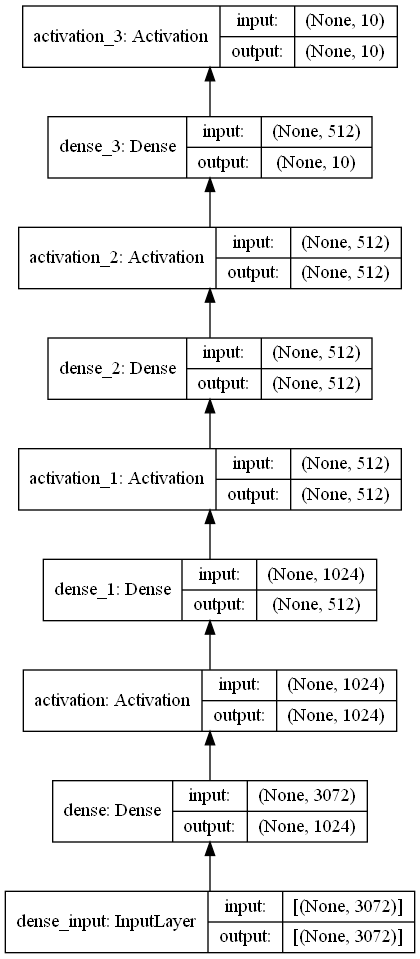

In [23]:
keras.utils.plot_model(model, show_shapes=True, rankdir="BT")

## 4. Fit / train the neural net

In [24]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test), verbose=1) 

Epoch 1/100
500/500 [==============================] - 11s 21ms/step - loss: 2.2554 - accuracy: 0.1528 - val_loss: 2.0832 - val_accuracy: 0.2214
Epoch 2/100
500/500 [==============================] - 8s 16ms/step - loss: 2.0699 - accuracy: 0.2279 - val_loss: 1.9807 - val_accuracy: 0.2711
Epoch 3/100
500/500 [==============================] - 7s 14ms/step - loss: 1.9839 - accuracy: 0.2736 - val_loss: 1.9438 - val_accuracy: 0.2898
Epoch 4/100
500/500 [==============================] - 8s 15ms/step - loss: 1.9275 - accuracy: 0.3038 - val_loss: 1.9007 - val_accuracy: 0.3063
Epoch 5/100
500/500 [==============================] - 7s 15ms/step - loss: 1.8898 - accuracy: 0.3131 - val_loss: 1.8753 - val_accuracy: 0.3189
Epoch 6/100
500/500 [==============================] - 7s 15ms/step - loss: 1.8654 - accuracy: 0.3237 - val_loss: 1.8148 - val_accuracy: 0.3466
Epoch 7/100
500/500 [==============================] - 8s 15ms/step - loss: 1.8240 - accuracy: 0.3456 - val_loss: 1.8077 - val_accuracy

## 5. Evaluate the neural net

In [25]:
# Done in the previous step, how?

## 6. Make predictions / classifications for unseen data

In [26]:
#not yet until we enhanced the results
predictions = model.predict(X_test)
predictions

array([[3.1462580e-02, 6.0446355e-03, 7.5248957e-02, ..., 7.1296850e-03,
        1.2931229e-01, 2.2290808e-03],
       [2.5457250e-02, 7.7308036e-02, 1.7517004e-03, ..., 3.1612776e-04,
        7.3568988e-01, 1.5735437e-01],
       [3.9775747e-01, 3.5304338e-02, 1.3587039e-02, ..., 1.3170856e-02,
        4.7061589e-01, 4.6115007e-02],
       ...,
       [4.0864330e-03, 8.5496373e-05, 7.7821195e-02, ..., 8.8951737e-02,
        1.3151289e-02, 3.0319060e-03],
       [3.9520944e-04, 1.8979317e-05, 4.1501775e-02, ..., 3.2886413e-03,
        1.8261572e-04, 1.4299894e-04],
       [4.6986481e-03, 6.1633968e-05, 1.2277418e-02, ..., 9.1913903e-01,
        1.0347056e-04, 4.0158746e-04]], dtype=float32)

<hr>

# To see what the network has learned, we can visualize the weights of the hidden layer. 

<p> we'll visualize the weights of 100 random neurons from the first layer. We'll reshape the weights to 32x32 arrays and we'll compute the mean value of the 3 color channels to produce a grayscale image.



In [27]:
weights = model.layers[0].get_weights() 

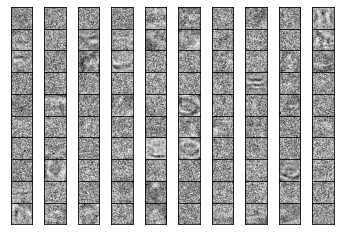

In [28]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import numpy
import random

fig = plt.figure()
outer_grid = gridspec.GridSpec(10, 10, wspace=0.0, hspace=0.0)

weights = model.layers[0].get_weights()

w = weights[0].T

for i, neuron in enumerate(random.sample(range(0, 1023), 100)):
 ax = plt.Subplot(fig, outer_grid[i])
 ax.imshow(numpy.mean(numpy.reshape(w[i], (32, 32, 3)), axis=2), cmap=cm.Greys_r)
 ax.set_xticks([])
 ax.set_yticks([])
 fig.add_subplot(ax)

plt.show()

<p>Composite figure with the weights of 100 random neurons from the first layer. Unlike MNIST, there is no clear indication of what the neurons might have learned
Compared to the MNIST example, training takes much longer. But by the end, we'll have about 60% training accuracy and only about 51% test accuracy, despite the larger network. This is due to the higher complexity of the data. The accuracy of the training keeps increasing, but the validation accuracy plateaus at some point, showing that the network starts to overfit and to saturate some parameters.